In [11]:
# import libraries we'll need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
#Loading data

df = pd.read_csv('/content/ehresp_2014.csv')
df.head()


,tucaseid,tulineno,eeincome1,erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,...,eumeat,eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1
0,20140101140007,1,-2,33.200001,1,-1,-1,30,2,0,...,1,2,1,-1,2,1,2,170,1,2
1,20140101140011,1,1,22.700001,3,1,-1,45,14,0,...,1,2,1,-1,1,2,2,128,2,0
2,20140101140028,1,2,49.400002,3,5,-1,60,0,0,...,-1,-1,2,2,-1,-1,-1,270,2,12
3,20140101140063,1,-2,-1.000000,3,-1,-1,0,0,0,...,2,2,1,1,2,6,-1,-2,2,2
4,20140101140168,1,2,31.000000,3,5,-1,65,0,0,...,1,2,1,2,1,1,2,210,1,0


In [13]:
print(df.isnull().any())
print(df.isnull().sum())

tucaseid       False
tulineno       False
eeincome1      False
erbmi          False
erhhch         False
erincome       False
erspemch       False
ertpreat       False
ertseat        False
ethgt          False
etwgt          False
eudietsoda     False
eudrink        False
eueat          False
euexercise     False
euexfreq       False
eufastfd       False
eufastfdfrq    False
euffyday       False
eufdsit        False
eufinlwgt      False
eusnap         False
eugenhth       False
eugroshp       False
euhgt          False
euinclvl       False
euincome2      False
eumeat         False
eumilk         False
euprpmel       False
eusoda         False
eustores       False
eustreason     False
eutherm        False
euwgt          False
euwic          False
exincome1      False
dtype: bool
tucaseid       0
tulineno       0
eeincome1      0
erbmi          0
erhhch         0
erincome       0
erspemch       0
ertpreat       0
ertseat        0
ethgt          0
etwgt          0
eudietsoda     0
eudrink

In [14]:
# remove rows where bmi is less than 0
df = df[df['erbmi'] > 0]

In [15]:
# set input and output variables to use in regression model
x = df[['euexfreq', 'euwgt', 'euhgt', 'ertpreat']]
y = df['erbmi']

# add intercept to input variable
x = sm.add_constant(x)

# fit regression model, using statsmodels GLM uses a different method but gives the same results
#model = sm.GLM(y, x, family=sm.families.Gaussian()).fit()
model = sm.OLS(y, x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


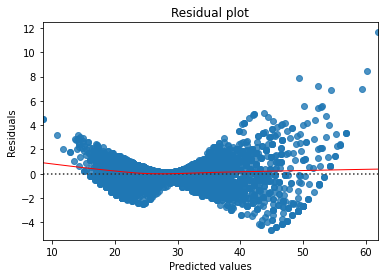

In [16]:
# seaborn residual plot
sns.residplot(model.fittedvalues, df['erbmi'], lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

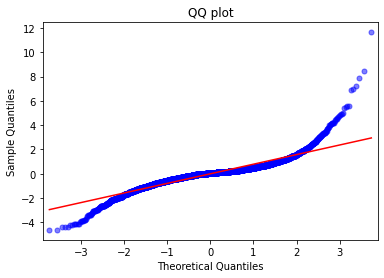

In [17]:
# statsmodels Q-Q plot on model residuals
QQ = ProbPlot(model.resid)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


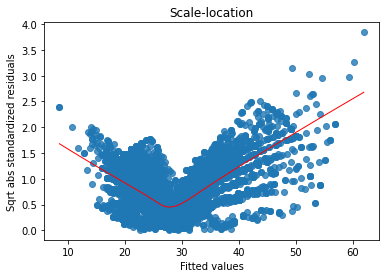

In [18]:
# normalised residuals
model_norm_resid = model.get_influence().resid_studentized_internal

# absolute squared normalised residuals
model_norm_resid_abs_sqrt = np.sqrt(np.abs(model_norm_resid))

# plot scale-location
sns.regplot(model.fittedvalues, model_norm_resid_abs_sqrt, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


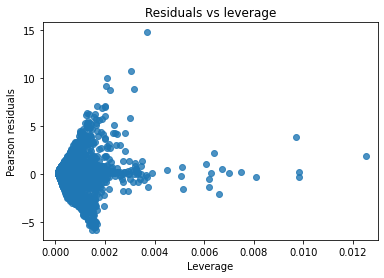

In [19]:
# get data relating to high leverage points using statsmodels

# leverage, from statsmodels
model_leverage = model.get_influence().hat_matrix_diag

# plot residuals vs high leverage points
sns.regplot(model_leverage, model.resid_pearson, fit_reg=False)
plt.xlim(xmin=-0.0005, xmax=0.013)
plt.xlabel('Leverage')
plt.ylabel("Pearson residuals")
plt.title("Residuals vs leverage");

In [20]:
# examine our model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  erbmi   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.593e+05
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:55:01   Log-Likelihood:                -12587.
No. Observations:               10637   AIC:                         2.518e+04
Df Residuals:                   10632   BIC:                         2.522e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.6005      0.129    439.005      0.000      56.348      56.853
euexfreq       0.0012      0.002      0.504      0.615      -0.003       0.006
euwgt          0.1584      0.000    789.810      0.000       0.158       0.159
euhgt         -0.8510      0.002   -397.797      0.000      -0.855      -0.847
ertpreat   -3.361e-05      0.000     -0.210      0.833      -0.000       0.000
==============================================================================
Omnibus:                     3116.813   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90924.598
Skew:                           0.796   Prob(JB):                         0.00
Kurtosis:                      17.234   Cond. No.                     3.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""